In [97]:
###################
#インポート
###################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [98]:
###################
#データセットをダウンロード
###################

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()



print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print("X_train[0]:{}".format(X_train[0])) #------検証中--------

print("------検証中---------")

(60000, 28, 28)
(10000, 28, 28)
uint8
X_train[0]:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0  

In [99]:
###################
#平滑化(1, 28, 28)の各画像を(1, 784)に変換
###################

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print("X_train:{}".format(X_train)) #------検証中--------
print("X_test:{}".format(X_test)) #------検証中--------

X_train:[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
X_test:[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


image:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 

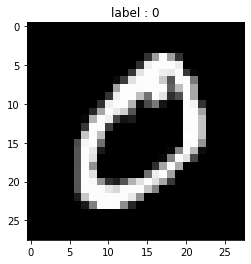

In [100]:
###################
#画像の表示
###################

import matplotlib.pyplot as plt
%matplotlib inline

#1枚目の画像を表示させてみる
index = 1
image = X_train[index].reshape(28,28) #なんで(-1, 784)をまた(28,28)にしたの？
print("image:{}".format(image)) #------検証中--------

#画像の表示
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

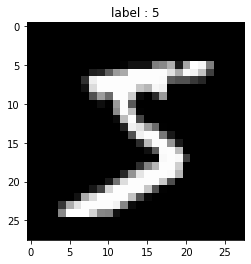

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [101]:
###################
#マイナスのデータ画像表示
###################

index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認


In [102]:
###################
#前処理データをフロート型にして255で割ることで正規化
###################

#データの型を変換
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)

#データを0から1の数字に変換
X_train /= 255
X_test /= 255

print(X_train.max()) # 1.0
print(X_train.min()) # 0.0


1.0
0.0


In [103]:
###################
#ｙの値の0-9をone-hot表現に変換
###################

#encでワンホットエンコーダをインスタンス化
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

#y-trainとy-testをone-hot表現に変換（np.newaxisで次元を追加している）
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

#y_train.shape：６００００個の０から９の数字(画像データではない）
print(y_train.shape) # (60000,)

#y_train_one_hot.shape：６００００個の０から９を表す0と1のデータ
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print("y_train_one_hot[0]:{}".format(y_train_one_hot[0])) #------検証中--------



(60000,)
(60000, 10)
float64
y_train_one_hot[0]:[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [104]:
###################
#Xとｙのトレーニングデータを分割
###################

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.0001)
print(X_train.shape) # (48000, 784)
print(X_val.shape) #
print(y_val) #


(59994, 784)
(6, 784)
[1 8 7 3 2 7]


In [105]:
###################
#【雛形】シンプルな三層ニューラルネットワーク分類器
###################
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = True):
        self.verbose = verbose #学習結果を出力するかどうか
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pass
        return




In [106]:
###################
#ミニバッチ処理
###################

class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        # self.batch_size：20　ミニバッチ
        self.batch_size = batch_size

        # ランダム番号０
        np.random.seed(seed)

        # np.random.permutation：配列の要素をランダムに並べ替えた新しい配列を生成
        ## np.arange：間隔１の等差配列をつくる
        ### X.shape[0]はXのデータ数
        #### Xのインデックスがランダムに並べ替えた配列
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        #print("shuffle_index:{}".format(shuffle_index)) #------検証中--------

        #要素がランダムなX
        self._X = X[shuffle_index]
        #要素がランダムなｙ
        self._y = y[shuffle_index]

        # np.ceil：小数点切り捨て
        ## .astype：データ型を変換
        ### self.batch_size:バッチサイズ２０
        #### self._stop：Xのデータ数をバッチサイズ20で割った変数
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    # 特殊メソッド
    def __len__(self):
        return self._stop
    def __getitem__(self,item):#itemはなに？
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size

        return self._X[p0:p1], self._y[p0:p1]
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]




In [107]:
###################
#ミニバッチクラスのインスタンス化
###################

#GetMiniBatch：ミニバッチ生成クラス
## get_mini_batchでインスタンス化
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print("get_mini_batch[5]:{}".format(get_mini_batch[5])) # 5番目のミニバッチが取得できる
print("------検証中---------")
print("\n")

#インスタンスをforのinに使う
for mini_X_train, mini_y_train in get_mini_batch:
    print("mini_X_train:{}".format(mini_X_train)) #------検証中--------
    print("mini_y_train:{}".format(mini_y_train)) #------検証中--------
    print("get_mini_batch:{}".format(get_mini_batch)) #------検証中--------


    # このfor文内でミニバッチが使える
    pass




3000
get_mini_batch[5]:(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([5, 0, 2, 1, 3, 0, 8, 0, 9, 9, 1, 9, 2, 5, 0, 0, 3, 0, 0, 5],
      dtype=uint8))
------検証中---------


mini_X_train:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
mini_y_train:[4 8 6 0 3 9 2 1 5 0 6 2 7 1 6 1 8 4 9 8]
get_mini_batch:<__main__.GetMiniBatch object at 0x0000019100504880>
mini_X_train:[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
mini_y_train:[5 8 7 4 8 8 0 0 7 1 0 2 3 3 4 5 8 4 3 3]
get_mini_batch:<__main__.GetMiniBatch object at 0x0000019100504880>
mini_X_train:[[0. 0. 0. ... 0. 0. 0.]
 [0

###################
#【問題1】重みの初期値を決めるコードの作成
###################

# self.n_features（Xのデータ数）×　self.n_nodes1（1層目のノード数）のランダムな配列を作る
## np.random.randn：平均0、分散1（標準偏差1）の乱数を生成する
self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)

# 2層目は１層目のノード数分出力するため　self.n_nodes1（1層目のノード数）×　self.n_nodes2（２層目のノード数）
self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
# ３層目は２層目のノード数分出力するため　self.n_nodes2（２層目のノード数）×　self.n_output（３層目のノード数）
self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)

#切片はそれぞれのノード数分必要になる
self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
self.B3 = self.sigma * np.random.randn(1, self.n_output)


###################
#【問題2】フォワードプロパゲーションの実装
###################

def forward(self, X):
    """順伝播
    Parameters
    ----------
    X : 説明変数
    """
    ## 1層目
    # 活性化関数に通す前
    self.A1 = X @ self.W1 + self.B1
    # 上記を活性化関数に通す
    # tanh_function：ハイパボリックタンジェント、あらゆる入力値を-1.0～1.0の範囲の数値に変換して出力する関数
    self.Z1 = self.tanh_function(self.A1)

    ## 2層目
    # 活性化関数に通す前
    self.A2 = self.Z1 @ self.W2 + self.B2
    # 上記を活性化関数に通す
    self.Z2 = self.tanh_function(self.A2)

    ## 3層目（出力層）
    # 活性化関数に通す前
    self.A3 = self.Z2 @ self.W3 + self.B3
    # 上記を活性化関数に通す
    self.Z3 = self.softmax(self.A3)

    # メンバ変数self.Z3がNNの出力となる


###################
#【問題3】交差エントロピー誤差(目的関数（損失関数）)の実装
###################

def cross_entropy_error(self, y, Z):
    """損失関数　クロスエントロピー誤差
    Parameters
    ----------
    y : 正解データ
    Z : 予測値
    """
    L = - np.sum(y * np.log(Z)) / len(y)
    return L


###################
#【問題4】バックプロパゲーションの実装
###################

def backward(self, X, y):
    """逆伝播
    Parameters
    ----------
    X : 説明変数
    """
    ## 3層目（出力層）
    # 3層目の重みに対する勾配
    dA3 = self.Z3 - y
    dW3 = self.Z2.T @ dA3
    # 3層目のバイアス項に対する勾配
    dB3 = np.sum(dA3, axis=0)

    ## 2層目
    # 2層目の重みに対する勾配
    dZ2 = dA3 @ self.W3.T
    dA2 = dZ2 * (1 - self.tanh_function(self.A2)**2)
    dW2 = self.Z1.T @ dA2
    # 2層目のバイアス項に対する勾配
    dB2 = np.sum(dA2, axis=0)

    ## 1層目
    # 1層目の重みに対する勾配
    dZ1 = dA2 @ self.W2.T
    dA1 = dZ1 * (1 - self.tanh_function(self.A1)**2)
    dW1 = X.T @ dA1
    # 1層目のバイアス項に対する勾配
    dB1 = np.sum(dA1, axis=0)

    # 各勾配に学習率を掛けて更新
    self.W3 -= self.lr * dW3
    self.B3 -= self.lr * dB3
    self.W2 -= self.lr * dW2
    self.B2 -= self.lr * dB2
    self.W1 -= self.lr * dW1
    self.B1 -= self.lr * dB1


###################
#【問題5】推定
###################

def predict(self, X):
    """予測
    Parameters
    ----------
    X : 説明変数
    """
    # 順伝播処理
    self.forward(X)
    # 最も大きいインデックスをクラスとして採用
    return np.argmax(self.Z3, axis=1)


[2.2955137187041204, 2.2908780621731144, 2.287100525033603, 2.2838032518105167, 2.280903757767332, 2.278165591115278, 2.2755248936627717, 2.2730228755142323, 2.2706240480007307, 2.268336389262914, 2.266173255876656, 2.2640885410202647, 2.26210384678548, 2.2603399887566353, 2.2588161762310666, 2.257378274144502, 2.2558965842135965, 2.254386384873135, 2.252851055660648, 2.251216881412939] [2.3073591994256244, 2.3075888219493197, 2.3059753927040143, 2.305343067733988, 2.305958282599009, 2.3067225047479534, 2.307526193421855, 2.3093007616117216, 2.3120929492873934, 2.315074969562337, 2.317907482683498, 2.320584872598669, 2.323043076133496, 2.325497918993004, 2.3280832727780636, 2.330508745817552, 2.3327293138525147, 2.3350562799490557, 2.3373961391702895, 2.339328376851684]


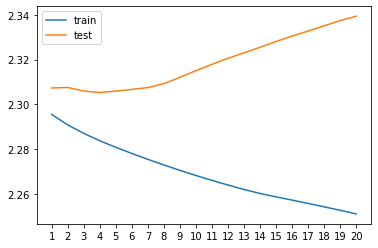

[2.2955137187041204, 2.2908780621731144, 2.287100525033603, 2.2838032518105167, 2.280903757767332, 2.278165591115278, 2.2755248936627717, 2.2730228755142323, 2.2706240480007307, 2.268336389262914, 2.266173255876656, 2.2640885410202647, 2.26210384678548, 2.2603399887566353, 2.2588161762310666, 2.257378274144502, 2.2558965842135965, 2.254386384873135, 2.252851055660648, 2.251216881412939] [2.3073591994256244, 2.3075888219493197, 2.3059753927040143, 2.305343067733988, 2.305958282599009, 2.3067225047479534, 2.307526193421855, 2.3093007616117216, 2.3120929492873934, 2.315074969562337, 2.317907482683498, 2.320584872598669, 2.323043076133496, 2.325497918993004, 2.3280832727780636, 2.330508745817552, 2.3327293138525147, 2.3350562799490557, 2.3373961391702895, 2.339328376851684]


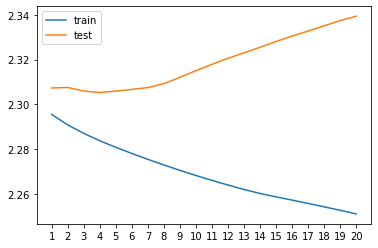

In [108]:
###################
#【問題6】学習と推定
###################

class ScratchSimpleNeuralNetrowkClassifier():

    def __init__(self,batch_size = 20,n_features = 784,n_nodes1 = 400,n_nodes2 = 200,n_output = 10,sigma = 0.02,lr = 0.01,epoch = 10, verbose=True):
        """学習に必要なメンバ変数の初期化
        Parameters
        ----------
        verbose : 計算過程を出力するか否か
        batch_size : ミニバッチのデータ数
        n_features : 説明変数の数
        n_nodes1 : 1層目のノードの数
        n_nodes2 : 2層目のノードの数
        n_output : 出力層のノードの数
        sigma : 重みの初期化の際のガウス分布の標準偏差
        lr : 学習率
        epoch : 学習回数
        """
        self.verbose = verbose
        self.batch_size = batch_size
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch
        # 損失記録用
        self.loss_train = []
        self.loss_test = []
        # 使用する重みの初期化
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B1 = self.sigma * np.random.randn(1, self.n_nodes1)
        self.B2 = self.sigma * np.random.randn(1, self.n_nodes2)
        self.B3 = self.sigma * np.random.randn(1, self.n_output)

    def fit(self, X, y, X_test=None, y_test=None):
        """学習
        Parameters
        ----------
        X : 説明変数
        y : 目的変数
        X_test : 説明変数
        y_test : 目的変数

        Overview
        ----------
        学習回数分学習を繰り返すが、各学習の中でもミニバッチで全データ学習させている。
        イメージとしては、下記
        学習0回目
        　ミニバッチ学習0回目→ミニバッチ学習1回目→・・・
        学習1回目
        　ミニバッチ学習0回目→ミニバッチ学習1回目→・・・
        ・・・・
        """
        # 学習回数分ループ
        for _ in range(self.epoch):

            # 先ほど定義したミニバッチイテレータのインスタンス化
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)

            # ミニバッチイテレータが停止するまでバッチ学習
            # get_mini_batchを呼び出すたびに、説明変数と目的変数が返ってくる
            for mini_X_train, mini_y_train in get_mini_batch:
                # 順伝播
                self.forward(mini_X_train)
                # 逆伝播
                self.backward(mini_X_train, mini_y_train)

            # ミニバッチ学習後のロス計算
            self.forward(X)
            self.loss_train.append(self.cross_entropy_error(y, self.Z3))
            # 評価データがあるなら、こちらも計算
            if X_test is not None:
                self.forward(X_test)
                self.loss_test.append(self.cross_entropy_error(y_test, self.Z3))

        # 学習過程の出力
        if self.verbose:
            if X_test is None:
                print(self.loss_train)
            else:
                print(self.loss_train,self.loss_test)

    def forward(self, X):
        """順伝播
        Parameters
        ----------
        X : 説明変数
        """
        ## 1層目
        # 活性化関数に通す前
        self.A1 = X @ self.W1 + self.B1
        # 上記を活性化関数に通す
        self.Z1 = self.tanh_function(self.A1)

        ## 2層目
        # 活性化関数に通す前
        self.A2 = self.Z1 @ self.W2 + self.B2
        # 上記を活性化関数に通す
        self.Z2 = self.tanh_function(self.A2)

        ## 3層目（出力層）
        # 活性化関数に通す前
        self.A3 = self.Z2 @ self.W3 + self.B3

        # Z3：各ラベル（0〜9）に対する確率の配列
        ## 上記を活性化関数に通す
        self.Z3 = self.softmax(self.A3)



    def backward(self, X, y):
        """順伝播
        Parameters
        ----------
        X : 説明変数
        """
        ## 3層目（出力層）
        # 3層目の重みに対する勾配
        dA3 = self.Z3 - y
        dW3 = self.Z2.T @ dA3
        # 3層目のバイアス項に対する勾配
        dB3 = np.sum(dA3, axis=0)

        ## 2層目
        # 2層目の重みに対する勾配
        dZ2 = dA3 @ self.W3.T
        dA2 = dZ2 * (1 - self.tanh_function(self.A2)**2)
        dW2 = self.Z1.T @ dA2
        # 2層目のバイアス項に対する勾配
        dB2 = np.sum(dA2, axis=0)

        ## 1層目
        # 1層目の重みに対する勾配
        dZ1 = dA2 @ self.W2.T
        dA1 = dZ1 * (1 - self.tanh_function(self.A1)**2)
        dW1 = X.T @ dA1
        # 1層目のバイアス項に対する勾配
        dB1 = np.sum(dA1, axis=0)

        # 各勾配に学習率を掛けて更新
        self.W3 -= self.lr * dW3
        self.B3 -= self.lr * dB3
        self.W2 -= self.lr * dW2
        self.B2 -= self.lr * dB2
        self.W1 -= self.lr * dW1
        self.B1 -= self.lr * dB1

    #ハイパボリックタンジェント関数に通す関数
    def tanh_function(self, A):
        """活性化関数tanh
        Parameters
        ----------
        A : 何かしらの配列
        """
        return np.tanh(A)
    #ソフトマックス関数に通す関数
    def softmax(self, A):
        """活性化関数softmax
        Parameters
        ----------
        A : 何かしらの配列
        """
        return np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)

    #交差エントロピー誤差
    def cross_entropy_error(self, y, Z):
        """損失関数　クロスエントロピー誤差（目的関数（損失関数））
        Parameters
        ----------
        y : 正解データ
        Z : 予測値
        """
        L = - np.sum(y * np.log(Z)) / len(y)
        return L

    def predict(self, X):
        """予測
        Parameters
        ----------
        X : 説明変数
        """
        # 順伝播処理
        self.forward(X)
        # 最も大きいインデックスをクラスとして採用
        return np.argmax(self.Z3, axis=1)


#----ScratchSimpleNeuralNetrowkClassifierのインスタンス化----
nn = ScratchSimpleNeuralNetrowkClassifier(epoch=20)

# 学習
nn.fit(X_train[:10000],y_train_one_hot[:10000], X_test, y_test_one_hot)

# 予測
pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)

# 正解率
accuracy_score(y_train, pred_train),accuracy_score(y_test, pred_test)


###################
#【問題7】学習曲線のプロット
###################

plt.plot(list(range(1, nn.epoch+1)), nn.loss_train, label='train')
plt.plot(list(range(1, nn.epoch+1)), nn.loss_test, label='test')
plt.legend()
plt.xticks(list(range(1, nn.epoch+1)));